<h1 style='background: black; border-radius:10px; color: white; text-align: center'><center>Olympic Medals 🥇🥈🥉 EDA  : </center></h1>

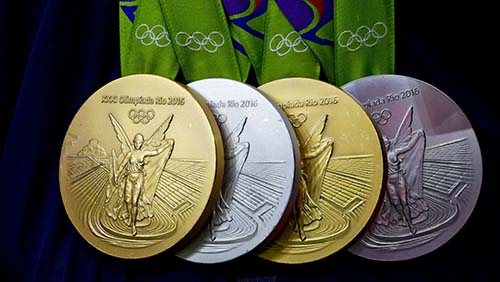

[Image Link](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.usatoday.com%2Fstory%2Fsports%2Folympics%2F2017%2F05%2F23%2Frio-olympic-games-medals-defective-show-rusting-chipping%2F102048222%2F&psig=AOvVaw1fPcEh4SU0VcWuir06VzPt&ust=1628778132600000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCOCL4MWVqfICFQAAAAAdAAAAABAD)

<h2 style='background: black; border-radius:10px; color: white'><center>Acknowledgement</center></h2>

This Notebook would not have been possible without the dataset provided by [@Berkay Alan](https://www.kaggle.com/berkayalan). If you haven't already, I strongly encourage you to upvote his dataset on [Tokyo 2020 Olympics Medals](https://www.kaggle.com/berkayalan/2021-olympics-medals-in-tokyo).

Upvoting a dataset or notebook hugely encourages and helps the community grow... ;)

<h2 style='background: black; border-radius: 10px; color: white'><center>Basic features of the data set</center></h2>

This is a basic exploratory data analysis of the 2020 Tokyo Olympic Medals that took place in Japan, 23 Jul 2021 – 8 Aug 2021


* Athletes from more than 200 countries participated in the olympic out of those 93 countries were able to win medals.

* With respect to medals, USA topped, then China followed by Japan and Great Britain

I have done an exploratory data analysis on this dataset...

Hopefully this will give you some insights. 

If you like this project then don't forget to **upvote**...

<h2 style='background: black; border:1; color: white'><center>Table of contents </center></h2>


* [Import](#chapter1)
* [Data visualization](#chapter2)
    * [Word Art of countries](#chapter3)
    * [Bar chart of all Country vs Total medals](#chapter4)
        * [Bar chart of all Country vs Gold medals](#chapter13)
        * [Bar chart of all Country vs Silver medals](#chapter14)
    * [Share of medals in 10 Countries](#chapter5)
    * [Stacked bar chart of medals won by top 10 countries](#chapter6)
    * [Share of medals in 10 Countries vs the rest ](#chapter7)
    * [Medals won by top 10 Countries ](#chapter8)
    * [Correlation between the feature](#chapter9)
    * [India ](#chapter10)
        * [India vs USA](#chapter11)
* [Thanks](#chapter12)

# Import <a class="anchor" id="chapter1"></a>

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
df = pd.read_csv("../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv")

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.Country.iloc[1] = "China"
df.Country.iloc[0] = 'USA'

In [ ]:
df.describe()

# Visualization <a class="anchor" id="chapter2"></a>

In [ ]:
# plot update function
def update_layout(title, xaxis_title = None, yaxis_title = None, legend_title = None, xgrid = False, ygrid = True) : 

    fig.update_layout(
        title={
                'text' : title,
                'y':0.95,
                'x':0.5
            },
        font_family="Palatino",
        title_font_family="Times New Roman",
        title_font_color="#2e2c61",    
        title_font_size = 22,       
        xaxis_title= xaxis_title,
        yaxis_title= yaxis_title,
        font_color="#262424",
        paper_bgcolor='white',
        plot_bgcolor='white',
        )

    try : 
        fig.update_layout(
            legend_title = legend_title,
            legend_title_font_color="green"
        )
    except : 
        pass
    if xgrid == True : 
        if ygrid == False :
            fig.update_xaxes(showline=True, linewidth=2, 
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
        else : 
            fig.update_xaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
            fig.update_yaxes(showline=True, linewidth=2,
                            linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")
    else : 
        fig.update_xaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=False)
        fig.update_yaxes(showline=True, linewidth=2,
                        linecolor='#626969', showgrid=True, gridcolor = "#c2c2c2")

    fig.show()

## Word Art of countries <a class="anchor" id="chapter3"></a>

In [ ]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df.Country))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

## Bar chart of all Country vs Total medals <a class="anchor" id="chapter4"></a>

In [ ]:
fig = px.bar(df, x ="Country", y = "Total")
update_layout("Bar chart of all Country vs Total medals", "Country", "Total Medals")

## Bar chart of all Country vs Gold medals <a class="anchor" id="chapter13"></a>

In [ ]:
fig = px.bar(df, x ="Country", y = "Gold Medal", color='Gold Medal')
update_layout("Bar chart of all Country vs Gold medals", "Country", "Gold Medals")

## Bar chart of all Country vs Silver medals <a class="anchor" id="chapter14"></a>

In [ ]:
fig = px.bar(df, x ="Country", y = "Gold Medal", color='Silver Medal')
update_layout("Bar chart of all Country vs Silver medals", "Country", "Gold Medals")

## Share of medals in 10 Countries <a class="anchor" id="chapter5"></a>

* USA has the highest number of gold, silver and bronze medals
* China has the highest share in gold and silver but not in bronze 

In [ ]:
rankedDf = df.sort_values(by = "Rank By Total").head(10)

fig = make_subplots(
        rows=2, cols=2,subplot_titles=('Total Medals','Gold Medals', 'Silver Medals','Bronze Medals'),
specs=[[ {'type': 'pie'} , {'type': 'pie'}],
       [ {'type': 'pie'} , {'type': 'pie'}]])


fig.add_trace(go.Pie(labels=rankedDf['Country'], values=rankedDf['Total']),row=1, col=1)

fig.add_trace(go.Pie(labels=rankedDf['Country'], values=rankedDf['Gold Medal']),row=1, col=2)

fig.add_trace(go.Pie(labels=rankedDf['Country'], values=rankedDf['Silver Medal']),row=2, col=1)

fig.add_trace(go.Pie(labels=rankedDf['Country'], values=rankedDf['Bronze Medal']), row=2, col=2)


update_layout("Share of medals in 10 Countries")

## Stacked bar chart of medals won by top 10 countries <a class="anchor" id="chapter6"></a>

In [ ]:
fig = go.Figure(data=[go.Bar( 
            x = df.Country.head(10), 
            y = df["Gold Medal"].head(10),
            name = "Gold Medal",
            marker={'color': '#f7e00c'}),
                      
                           go.Bar( 
            x = df.Country.head(10), 
            y = df["Silver Medal"].head(10),
            name = 'Silver Medal', 
            marker={'color': '#cfcfcc'}),

            go.Bar( 
            x = df.Country.head(10), 
            y = df["Bronze Medal"].head(10),
            name = "Bronze Medal",
            marker={'color': '#bd7620'})
        ]);
update_layout("Stacked bar chart of medals won by top 10 countries")

In [ ]:
otherList = ["Other Countries"]
goldMedal, silverMedal, bronzeMedal, total = 0, 0, 0, 0

for i in range(10,len(df)) : 
    goldMedal += df["Gold Medal"][i]
    silverMedal += df["Silver Medal"][i]
    bronzeMedal += df["Bronze Medal"][i]
    total += df["Total"][i]

otherList.append(goldMedal)
otherList.append(silverMedal)
otherList.append(bronzeMedal)
otherList.append(total)
otherList.append(0)

otherSeries = pd.Series(otherList, index = df.columns)
clubbedDf = df.head(10).append(otherSeries, ignore_index=True)
clubbedDf

## Share of medals in 10 Countries vs the rest <a class="anchor" id="chapter7"></a>

Sum of each medals in the rest of the country is always higher 

In [ ]:
fig = make_subplots(
        rows=2, cols=2,subplot_titles=('Total Medals','Gold Medals', 'Silver Medals','Bronze Medals'),
specs=[[ {'type': 'pie'} , {'type': 'pie'}],
       [ {'type': 'pie'} , {'type': 'pie'}]])


fig.add_trace(go.Pie(labels=clubbedDf['Country'], values=clubbedDf['Total']),row=1, col=1)

fig.add_trace(go.Pie(labels=clubbedDf['Country'], values=clubbedDf['Gold Medal']),row=1, col=2)

fig.add_trace(go.Pie(labels=clubbedDf['Country'], values=clubbedDf['Silver Medal']),row=2, col=1)

fig.add_trace(go.Pie(labels=clubbedDf['Country'], values=clubbedDf['Bronze Medal']), row=2, col=2)


update_layout("Share of medals in 10 Countries vs the rest")

## Medals won by top 10 Countries <a class="anchor" id="chapter8"></a>

In [ ]:
fig = make_subplots(
        rows=2, cols=2,subplot_titles=('Total Medals','Gold Medals', 'Silver Medals','Bronze Medals'))

fig.add_trace(go.Bar(x=rankedDf['Country'],y=rankedDf['Total'],  marker={'color': '#00c90a'},
                     name='Total Medal',textposition ='auto'),row=1, col=1)

fig.add_trace(go.Bar(
    x=rankedDf['Country'],y=rankedDf['Gold Medal'],marker={'color': '#f7e00c'},
    name='Gold Medal',textposition ='auto'),row=1, col=2)

fig.add_trace(go.Bar(x=rankedDf['Country'],y=rankedDf['Silver Medal'],marker={'color': '#cfcfcc'},
                     name='Silver Medal',textposition ='auto'),row=2, col=1)

fig.add_trace(go.Bar(
    x=rankedDf['Country'],y=rankedDf['Bronze Medal'],marker={'color': '#bd7620'},
    name='Bronze Medal',textposition ='auto'),row=2, col=2)

update_layout("Medals won by top 10 Countries")

## Correlation between the feature <a class="anchor" id="chapter9"></a>

In [ ]:
corrs = df.corr()
fig = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
update_layout("Correlation between the feature")

## India : <a class="anchor" id="chapter10"></a>

In [ ]:
df[df.Country == 'India']

### India vs USA <a class="anchor" id="chapter11"></a>

In [ ]:
indiaDf = df[df.Country == 'India'].append(df[df.Country == 'USA'])

fig = make_subplots(
        rows=2, cols=2,subplot_titles=('Total Medals','Gold Medals', 'Silver Medals','Bronze Medals'))

fig.add_trace(go.Bar(x=indiaDf['Country'],y=indiaDf['Total'],  marker={'color': '#00c90a'},
                     name='Total Medal',textposition ='auto'),row=1, col=1)

fig.add_trace(go.Bar(
    x=indiaDf['Country'],y=indiaDf['Gold Medal'],marker={'color': '#f7e00c'},
    name='Gold Medal',textposition ='auto'),row=1, col=2)

fig.add_trace(go.Bar(x=indiaDf['Country'],y=indiaDf['Silver Medal'],marker={'color': '#cfcfcc'},
                     name='Silver Medal',textposition ='auto'),row=2, col=1)

fig.add_trace(go.Bar(
    x=indiaDf['Country'],y=indiaDf['Bronze Medal'],marker={'color': '#bd7620'},
    name='Bronze Medal',textposition ='auto'),row=2, col=2)

update_layout("India vs USA")

If you Liked my EDA then do **upvote**. That really motivates a lot... <a class="anchor" id="chapter12"></a>

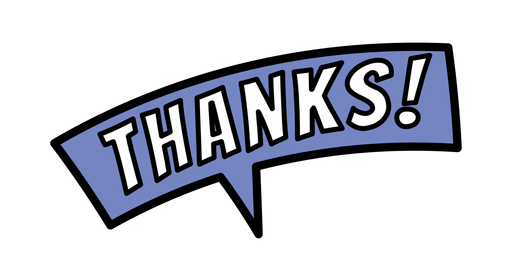